https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

**FEATURES DESCRIPTION**
* **Fixed acidity**: It indicates the amount of tartaric acid in wine and is 
measured in g/dm3
* **Volatile acidity**: It indicates the amount of acetic acid in the wine. It is measured in g/dm3.
* **Citric acid**: It indicates the amount of citric acid in the wine. It is also measured in g/dm3
* **Residual sugar**: It indicates the amount of sugar left in the wine after the fermentation process is done. It is also measured in g/dm3
Free sulfur dioxide: It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in g/dm3
* **Total sulfur dioxide**: It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and antimicrobial agent.
* **Density**: It indicates the density of the wine and is measured in g/dm3.
pH: It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, and 14 indicates basic acidity.
* **Sulphates**: It indicates the amount of potassium sulphate in the wine. It is also measured in g/dm3.
* **Alcohol**: It indicates the alcohol content in the wine.
* **Quality**: It indicates the quality of the wine, which is ranged from 1 to 10. Here, the higher the value is, the better the wine.

**Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import plotly as plotly
from scipy import stats
from scipy.stats import norm, boxcox
import scipy.stats


import plotly as plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import chart_studio.plotly as py


from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
df = pd.read_csv("winequality-red.csv")
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
854,9.3,0.360,0.39,1.5,0.080,41.0,55.0,0.99652,3.47,0.73,10.9,6
873,9.1,0.210,0.37,1.6,0.067,6.0,10.0,0.99552,3.23,0.58,11.1,7
916,5.3,0.715,0.19,1.5,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,5
1000,7.5,0.430,0.30,2.2,0.062,6.0,12.0,0.99495,3.44,0.72,11.5,7
1059,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
print("Number of nulls in df: \n\n", df.isna().sum())

Number of nulls in df: 

 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


There are no nulls in dataset, it's high quality. With that small dataset it will be hard to drop values and still get highly effective predictions.

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


High values of std are visible in residual sugar, free sulfur dioxide, total sulfur dioxide. It seems that dataset has outliers. Some values seems unreal - for example it's not possible to have a wine with no citric acid in it. There are not many differences in Density values - plot it against quality in next steps and think if these feature should be used.

In [6]:
print("Number of duplicates in df:", df.duplicated().sum())
#df = df.drop_duplicates(keep='first')

Number of duplicates in df: 240


Dropping duplicates makes dataset even smaller. As I've checked dropping all lowers predictions scores. I've decided to keep them.

In [7]:
print("Number of unique values in features: ")
df.nunique()

Number of unique values in features: 


fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [8]:
import matplotlib.colors as mcolors

colors = ['lightcoral', 'firebrick', 'crimson', 'tomato', 'salmon', 'mistyrose']

picking some nice red colours for charts in this notebook

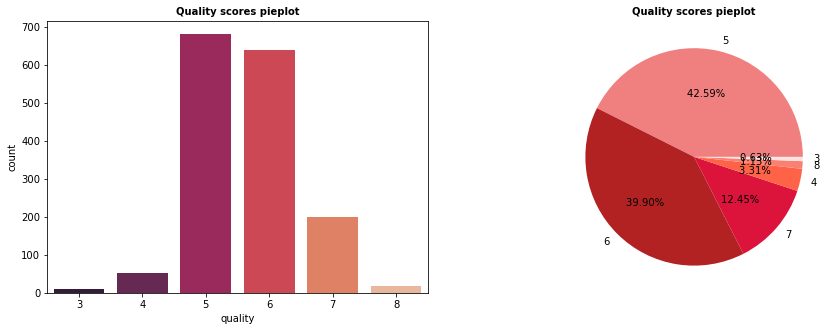

In [9]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.countplot(df['quality'], palette='rocket')
plt.title('Quality scores pieplot', fontweight= 'bold', fontsize = 10)

plt.subplot(1,2,2)
#I wanted to see %
values = [3, 4, 5, 6, 7, 8] 

#https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  '.format(p=pct,v=val)
    return my_autopct

ax = df['quality'].value_counts().plot.pie(
          autopct=make_autopct(values), colors=colors)

plt.title('Quality scores pieplot', fontweight= 'bold', fontsize = 10)

ax.set_ylabel('')
plt.show()


Quality in data is in scale from 1 to 10. There are no scores of 1, 2, 9, 10. Most wines got scored 5 or 6.

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

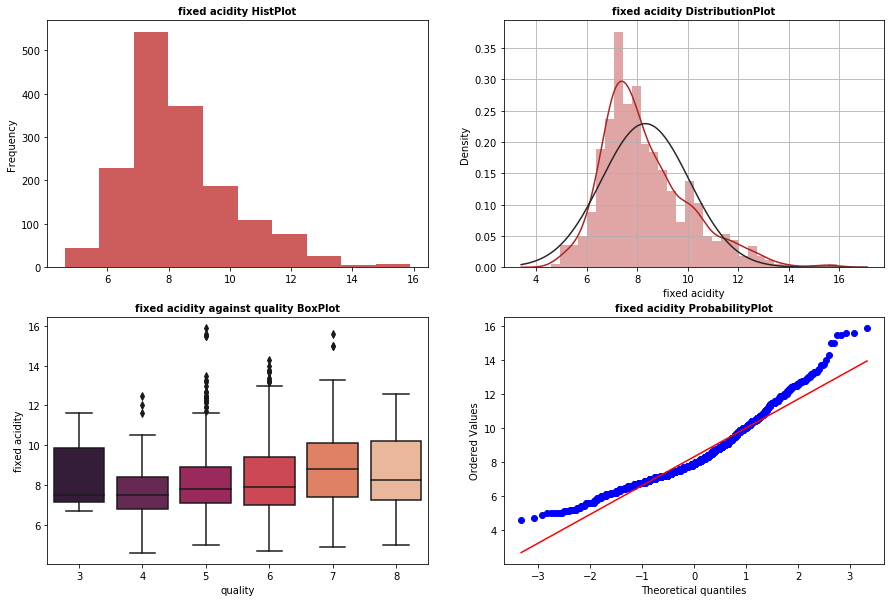

Skewness : 0.9827514413284587
Kurtosis : 1.1321433977276252
Std : 1.7410963181277006
Mean : 8.319637273295838


In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['fixed acidity'].plot(kind='hist', color='indianred')
plt.title("fixed acidity HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['fixed acidity'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("fixed acidity DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['fixed acidity'], palette='rocket')
plt.title("fixed acidity against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['fixed acidity'], plot = plt, )
plt.title("fixed acidity ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['fixed acidity'].skew())
print("Kurtosis :", df['fixed acidity'].kurt())
print("Std :", df['fixed acidity'].std())
print("Mean :", df['fixed acidity'].mean())

Slightly left skewed


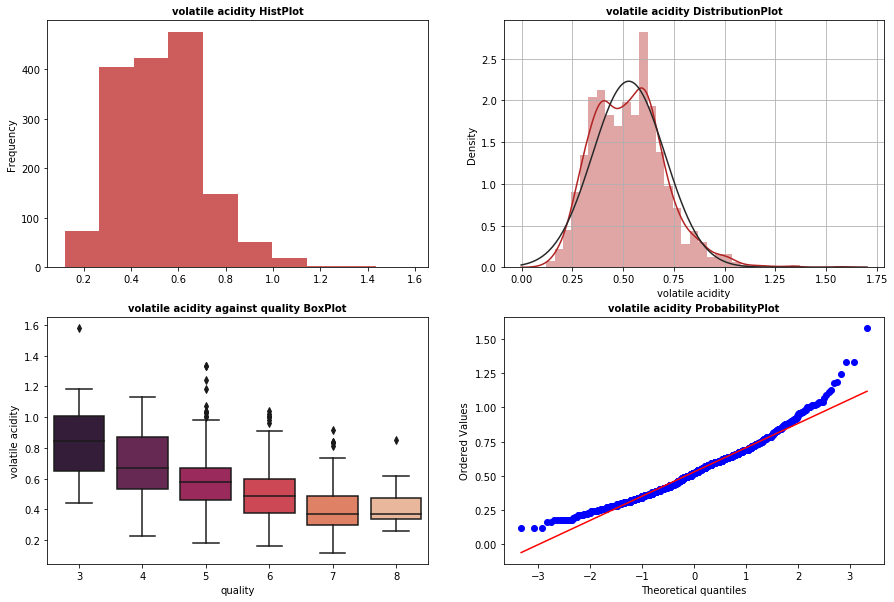

Skewness : 0.6715925723840199
Kurtosis : 1.2255422501791422
Std : 0.17905970415353498
Mean : 0.5278205128205131


In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['volatile acidity'].plot(kind='hist', color='indianred')
plt.title("volatile acidity HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['volatile acidity'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("volatile acidity DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['volatile acidity'], palette='rocket')
plt.title("volatile acidity against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['volatile acidity'], plot = plt, )
plt.title("volatile acidity ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['volatile acidity'].skew())
print("Kurtosis :", df['volatile acidity'].kurt())
print("Std :", df['volatile acidity'].std())
print("Mean :", df['volatile acidity'].mean())

distribution close to normal, negative correlation to quality

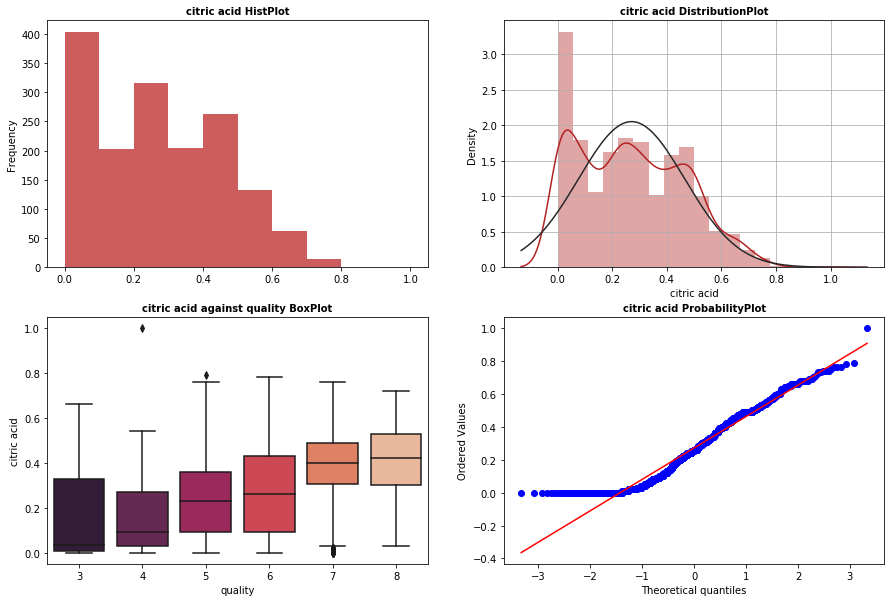

Skewness : 0.3183372952546368
Kurtosis : -0.7889975153633966
Std : 0.19480113740531785
Mean : 0.2709756097560964


In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['citric acid'].plot(kind='hist', color='indianred')
plt.title("citric acid HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['citric acid'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("citric acid DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['citric acid'], palette='rocket')
plt.title("citric acid against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['citric acid'], plot = plt, )
plt.title("citric acid ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['citric acid'].skew())
print("Kurtosis :", df['citric acid'].kurt())
print("Std :", df['citric acid'].std())
print("Mean :", df['citric acid'].mean())

outliers on left side, impossible "0" values, possitive correlation

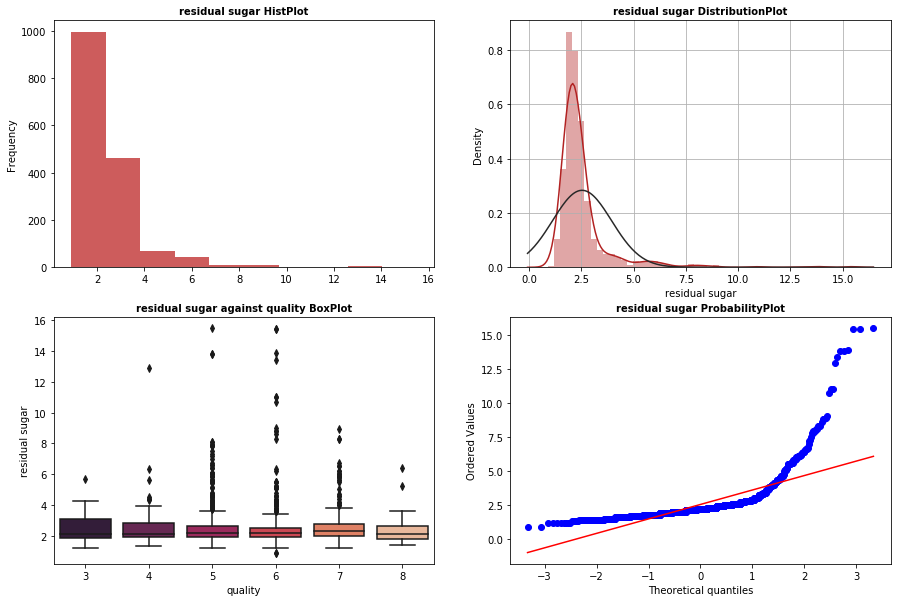

Skewness : 4.54065542590319
Kurtosis : 28.617595424475443
Std : 1.4099280595072805
Mean : 2.5388055034396517


In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['residual sugar'].plot(kind='hist', color='indianred')
plt.title("residual sugar HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['residual sugar'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("residual sugar DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['residual sugar'], palette='rocket')
plt.title("residual sugar against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['residual sugar'], plot = plt, )
plt.title("residual sugar ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['residual sugar'].skew())
print("Kurtosis :", df['residual sugar'].kurt())
print("Std :", df['residual sugar'].std())
print("Mean :", df['residual sugar'].mean())

seems unimportant

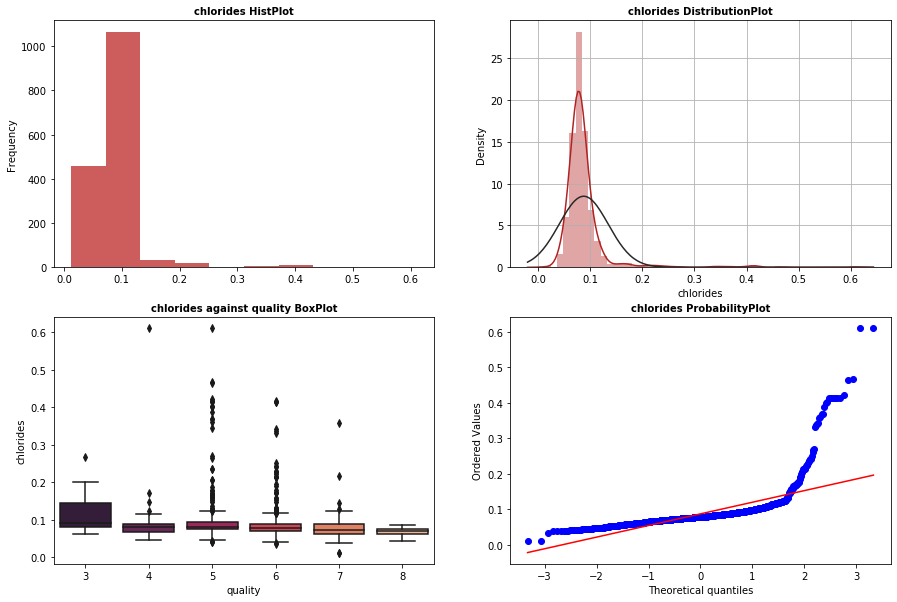

Skewness : 5.680346571971724
Kurtosis : 41.71578724757661
Std : 0.047065302010090154
Mean : 0.08746654158849257


In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['chlorides'].plot(kind='hist', color='indianred')
plt.title("chlorides HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['chlorides'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("chlorides DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['chlorides'], palette='rocket')
plt.title("chlorides against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['chlorides'], plot = plt, )
plt.title("chlorides ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['chlorides'].skew())
print("Kurtosis :", df['chlorides'].kurt())
print("Std :", df['chlorides'].std())
print("Mean :", df['chlorides'].mean())

high kurtosis, slightly negativly correlated

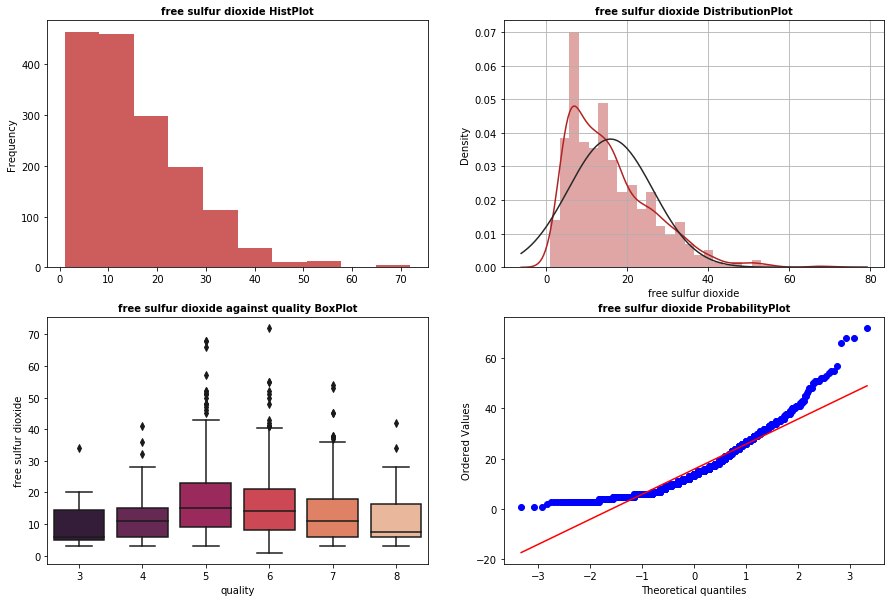

Skewness : 1.250567293314441
Kurtosis : 2.023562045840575
Std : 10.46015696980973
Mean : 15.874921826141339


In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['free sulfur dioxide'].plot(kind='hist', color='indianred')
plt.title("free sulfur dioxide HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['free sulfur dioxide'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("free sulfur dioxide DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['free sulfur dioxide'], palette='rocket')
plt.title("free sulfur dioxide against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['free sulfur dioxide'], plot = plt, )
plt.title("free sulfur dioxide ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['free sulfur dioxide'].skew())
print("Kurtosis :", df['free sulfur dioxide'].kurt())
print("Std :", df['free sulfur dioxide'].std())
print("Mean :", df['free sulfur dioxide'].mean())

right skewed

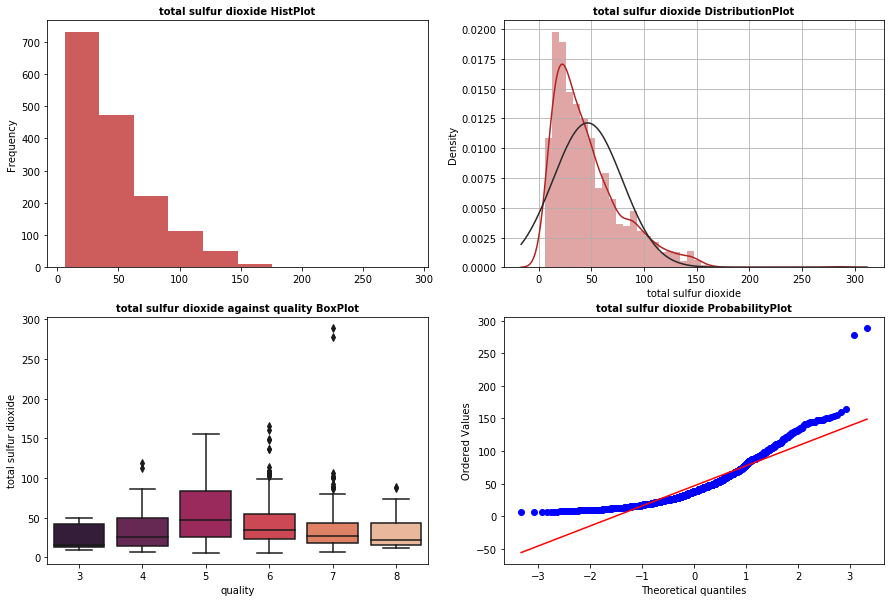

Skewness : 1.515531257594554
Kurtosis : 3.8098244878645744
Std : 32.89532447829901
Mean : 46.46779237023139


In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['total sulfur dioxide'].plot(kind='hist', color='indianred')
plt.title("total sulfur dioxide HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['total sulfur dioxide'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("total sulfur dioxide DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['total sulfur dioxide'], palette='rocket')
plt.title("total sulfur dioxide against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['total sulfur dioxide'], plot = plt, )
plt.title("total sulfur dioxide ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['total sulfur dioxide'].skew())
print("Kurtosis :", df['total sulfur dioxide'].kurt())
print("Std :", df['total sulfur dioxide'].std())
print("Mean :", df['total sulfur dioxide'].mean())

left skewed

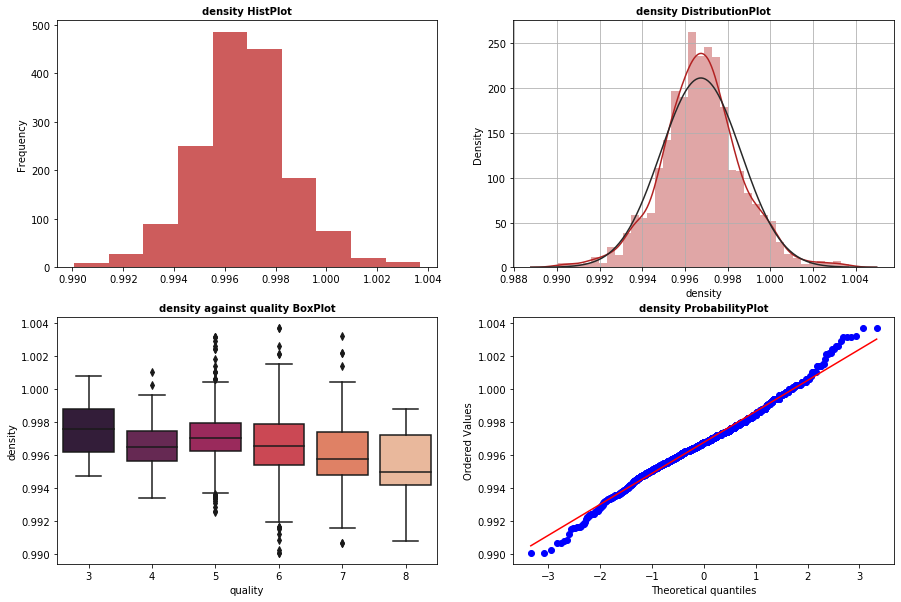

Skewness : 0.07128766294927483
Kurtosis : 0.9340790654648123
Std : 0.0018873339538425559
Mean : 0.9967466791744831


In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['density'].plot(kind='hist', color='indianred')
plt.title("density HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['density'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("density DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['density'], palette='rocket')
plt.title("density against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['density'], plot = plt, )
plt.title("density ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['density'].skew())
print("Kurtosis :", df['density'].kurt())
print("Std :", df['density'].std())
print("Mean :", df['density'].mean())

values super similar to each other, I will drop this feature

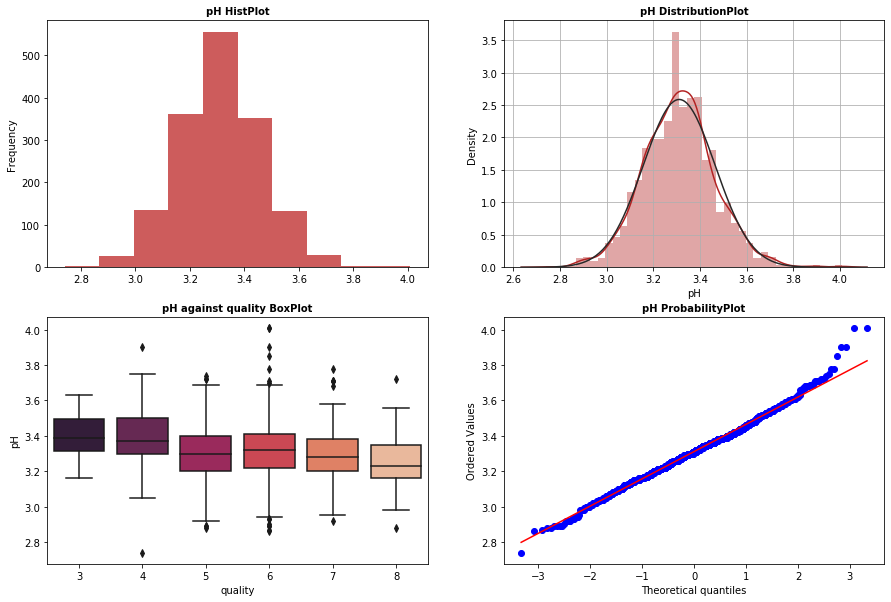

Skewness : 0.19368349811284427
Kurtosis : 0.806942508246574
Std : 0.15438646490354266
Mean : 3.311113195747343


In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['pH'].plot(kind='hist', color='indianred')
plt.title("pH HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['pH'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("pH DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['pH'], palette='rocket')
plt.title("pH against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['pH'], plot = plt, )
plt.title("pH ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['pH'].skew())
print("Kurtosis :", df['pH'].kurt())
print("Std :", df['pH'].std())
print("Mean :", df['pH'].mean())

Slightly negative correlated, distribution close to normal

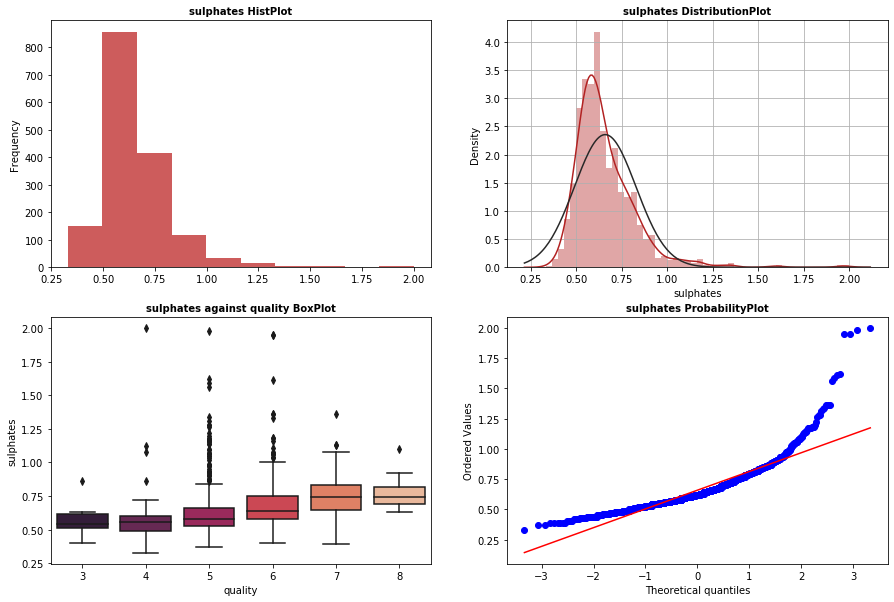

Skewness : 2.4286723536602945
Kurtosis : 11.720250727147674
Std : 0.16950697959010977
Mean : 0.6581488430268921


In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['sulphates'].plot(kind='hist', color='indianred')
plt.title("sulphates HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['sulphates'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("sulphates DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['sulphates'], palette='rocket')
plt.title("sulphates against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['sulphates'], plot = plt, )
plt.title("sulphates ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['sulphates'].skew())
print("Kurtosis :", df['sulphates'].kurt())
print("Std :", df['sulphates'].std())
print("Mean :", df['sulphates'].mean())

possitive correlation, has outliers, right skewed

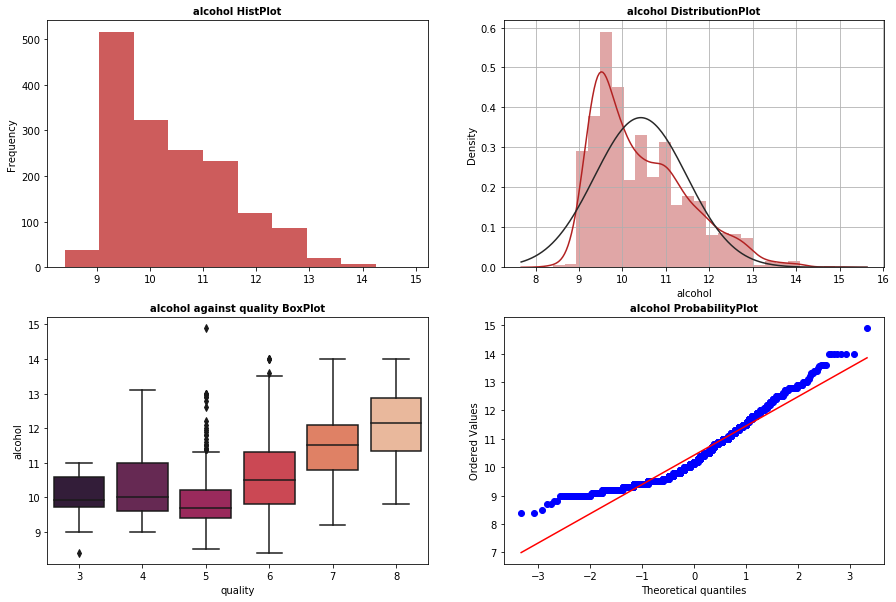

Skewness : 0.8608288068888538
Kurtosis : 0.2000293113417695
Std : 1.0656675818473926
Mean : 10.422983114446502


In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
df['alcohol'].plot(kind='hist', color='indianred')
plt.title("alcohol HistPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,2)
sns.distplot(df['alcohol'], kde=True, color='firebrick', fit=norm)
plt.grid(True)
plt.title("alcohol DistributionPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,3)
sns.boxplot(df['quality'], df['alcohol'], palette='rocket')
plt.title("alcohol against quality BoxPlot", fontweight= 'bold', fontsize = 10)

plt.subplot(2,2,4)
stats.probplot(df['alcohol'], plot = plt, )
plt.title("alcohol ProbabilityPlot", fontweight= 'bold', fontsize = 10)

plt.show()

print("Skewness :", df['alcohol'].skew())
print("Kurtosis :", df['alcohol'].kurt())
print("Std :", df['alcohol'].std())
print("Mean :", df['alcohol'].mean())

High possitive correlation, right skewed

Text(0.5, 1, 'Correlation Heatmap')

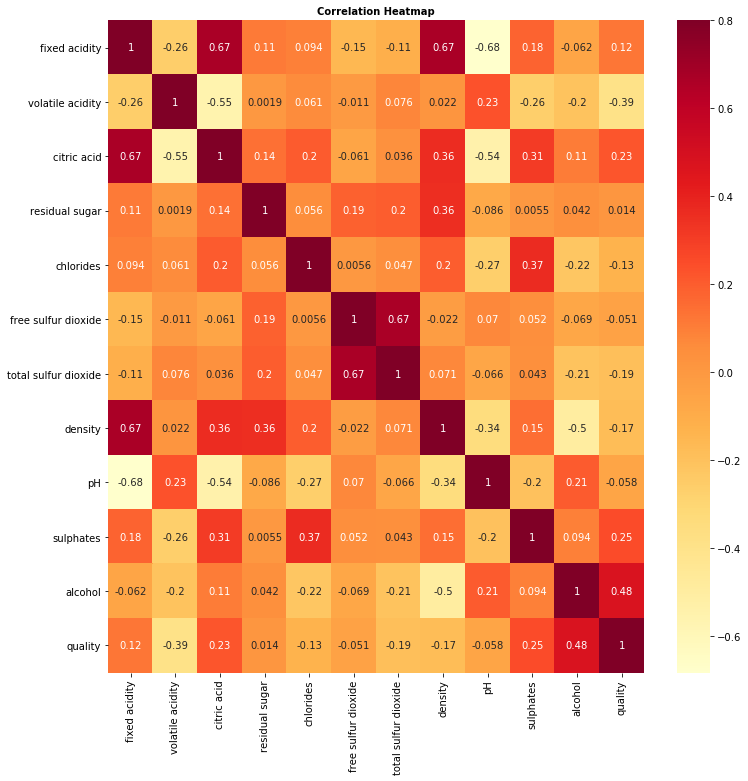

In [22]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), vmax=.8, annot= True, cmap="YlOrRd")
plt.title("Correlation Heatmap", fontweight= 'bold', fontsize = 10)

In [23]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Alcohol is best feature for wine prediction, volatile acidity has highest negative correlation what was visible in volatile acidity 3th chart (boxplots)

In [24]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

I check only features that have correlation above 0.3 or below -0.3. I am not plotting density as I've already decided to drop it.

Text(0.5, 1.0, 'fixed acidity / pH = -0.68')

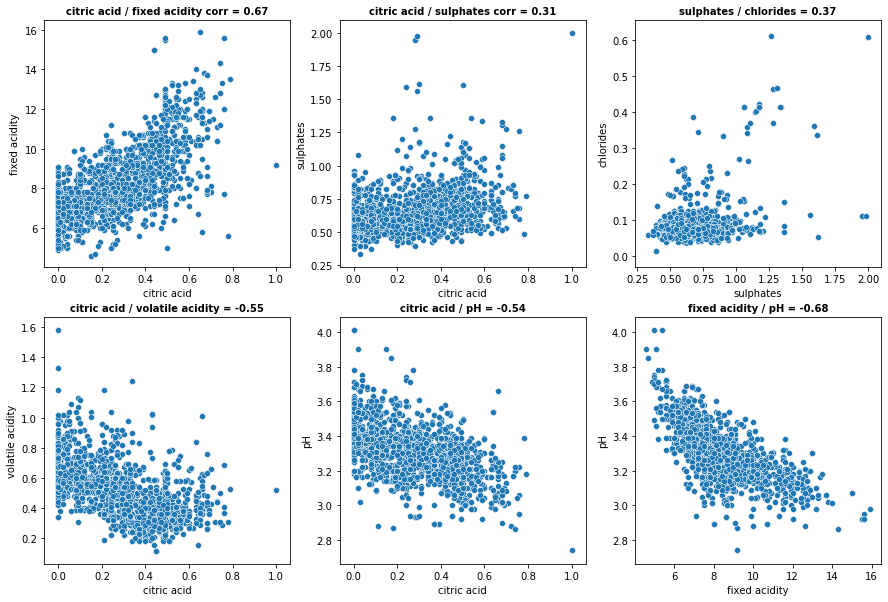

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.scatterplot(df['citric acid'], df['fixed acidity'])
plt.title("citric acid / fixed acidity corr = 0.67", fontweight= 'bold', fontsize = 10)

plt.subplot(2,3,2)
sns.scatterplot(df['citric acid'], df['sulphates'])
plt.title("citric acid / sulphates corr = 0.31", fontweight= 'bold', fontsize = 10)

plt.subplot(2,3,3)
sns.scatterplot(df['sulphates'], df['chlorides'])
plt.title("sulphates / chlorides = 0.37", fontweight= 'bold', fontsize = 10)

plt.subplot(2,3,4)
sns.scatterplot(df['citric acid'], df['volatile acidity'])
plt.title("citric acid / volatile acidity = -0.55", fontweight= 'bold', fontsize = 10)

plt.subplot(2,3,5)
sns.scatterplot(df['citric acid'], df['pH'])
plt.title("citric acid / pH = -0.54", fontweight= 'bold', fontsize = 10)

plt.subplot(2,3,6)
sns.scatterplot(df['fixed acidity'], df['pH'])
plt.title("fixed acidity / pH = -0.68", fontweight= 'bold', fontsize = 10)

Based on scatterplots I can say that there is a possiblity to use less features. I will try to drop citric acid and pH checking how it impacts model performance. Fixed acidity provides enough information about these features.

**Feature Engineering**

Log transform most skewed features

In [26]:
#Most skewed features are residual sugar, chlorides, sulphates, total sulfur dioxide, free sulfur dioxide, fixed acidity.

'''df['residual sugar'] = np.log(df['residual sugar'])
df['residual sugar'] = np.log(df['residual sugar'])
df['sulphates'] = np.log(df['sulphates'])
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])'''

"df['residual sugar'] = np.log(df['residual sugar'])\ndf['residual sugar'] = np.log(df['residual sugar'])\ndf['sulphates'] = np.log(df['sulphates'])\ndf['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])"

In [27]:
#Trying boxcox
df['residual sugar'], lam = boxcox(df['residual sugar'])
df['sulphates'], lam = boxcox(df['sulphates'])
df['total sulfur dioxide'], lam = boxcox(df['total sulfur dioxide'])
df['fixed acidity'], lam = boxcox(df['fixed acidity'])

boxcox and logtransformation produces similar scores. I've decided to go with boxcox, but difference in scores is hard to notice.

In [28]:
#Drop density as it ranges from 0.99 to 1.0, it has no impact on the model
df.drop('density', inplace=True, axis=1)

#Drop citic acid and pH based on corr plot
df.drop('pH', inplace=True, axis=1)
df.drop('citric acid', inplace=True, axis=1)

#try
df.drop('free sulfur dioxide', inplace=True, axis=1)
df.drop('chlorides', inplace=True, axis=1)

In [29]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 5 else 0)

I've tested mapping quality values as 4 categories, using quality straight away and changing it to binary which produced best score. Most data has values or 5 or 6 so it's justified to simply judge wine as good or bad (0 or 1)

[Text(0, 0.5, '\n Count \n'), Text(0.5, 0, '\n 0 = Bad \n 1 = Good \n')]

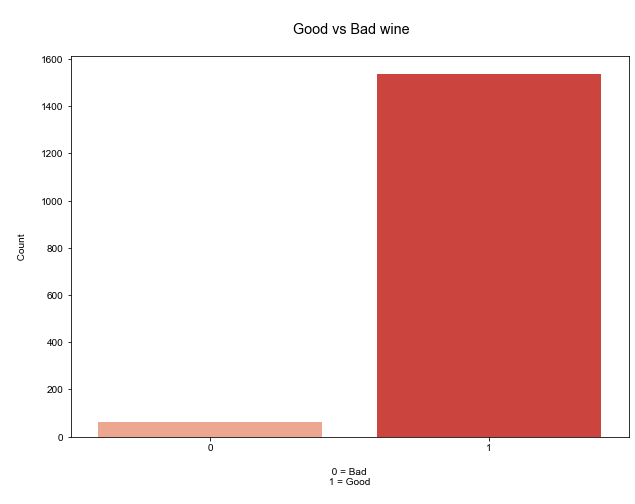

In [30]:
plt.figure(figsize=(10,7))
ax = sns.barplot(x = (df['quality_binary'].value_counts().reset_index())['index'], y = (df['quality_binary'].value_counts().reset_index())['quality_binary'], palette="Reds")
sns.set(font_scale = 1.2)
ax.set_title('\n Good vs Bad wine\n')
ax.set(xlabel = '\n 0 = Bad \n 1 = Good \n', ylabel = '\n Count \n')

This is an imbalanced dataset, we will perform an oversampling to match an imbalanced class.

**Outliers**

In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity           0.064156
volatile acidity        0.250000
residual sugar          0.122889
total sulfur dioxide    1.244427
sulphates               0.461392
alcohol                 1.600000
quality                 1.000000
quality_binary          0.000000
dtype: float64


In [32]:
df1 = df.copy()

print('DataFrame shape before removing outliers: ', df1.shape)
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print('DataFrame shape after removing outliers: ', df1.shape)

print('Rows that I would lose: ', 1599 - len(df1))

DataFrame shape before removing outliers:  (1599, 8)
DataFrame shape after removing outliers:  (1430, 8)
Rows that I would lose:  169


In [33]:
#5% percentile winsorizing
#df = scipy.stats.mstats.winsorize(df.values, limits = [0, 0.05])

This dataset has only 1599 records and we can already say it has outliers. I want to check 2 methods. I've already checked that dropping outliers has nearly no impact on model performance, the reason is at the same time we get rid of outliers we also make our small alredy dataset even smaller. I will compare different methods of imputing outliers and also winsorizing.

*Winsorizing*
Unlike trimming, here we replace the outliers with other values. Common is replacing the outliers on the upper side with 95% percentile value and outlier on the lower side with 5% percentile.

Dealing with outliers didn't improve model scores. For that reason, I've decided not to leave them.

**Random Over Sampler to match "0" records**

In [34]:
X_1 = df.drop(['quality', 'quality_binary'], axis = 1)
y_1 = df['quality_binary']

ros = RandomOverSampler()
X_1, y_1 = ros.fit_resample(X_1, y_1)

print('X_1 shape: ', X_1.shape)
print('y_1 shape: ', y_1.shape)

X_1 shape:  (3072, 6)
y_1 shape:  (3072,)


I've tested SMOTE and RandomOverSampler for dealing with imbalanced data. Got higher scores with second method

**Imports for ML**

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

#Classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

import shap

**Train, Test Split 80/20**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=.2, random_state=42)

print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (2457, 6)
y train size:  (2457,)
X test size:  (615, 6)
y test size:  (615,)


**SMOTE**

In [37]:
#Using Smote
#X_train, y_train = sm.fit_resample(X_train, y_train)

checked it's worse than random oversampling for this dataset

**Standard Scaling**

In [38]:
#Using Standard Scaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Mutual Information Scores**

In [39]:
#Check MI scores
discrete_features = X_1.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X_1, y_1, discrete_features)
mi_scores

volatile acidity        0.301314
total sulfur dioxide    0.266905
sulphates               0.192233
fixed acidity           0.170384
residual sugar          0.169860
alcohol                 0.132076
Name: MI Scores, dtype: float64

Mutual information proves that alcohol , volatile acidity are best features for predicting quality.

**Classification**

RandomForestClassifier
Cross Validation score :  0.99267131242741
Test set score :  0.9967479674796748
Train set score :  1.0
Precision:  1.0
Recall:  0.9935483870967742
F1:  0.9967637540453074


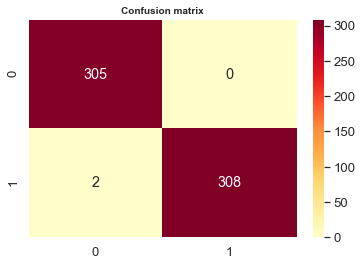

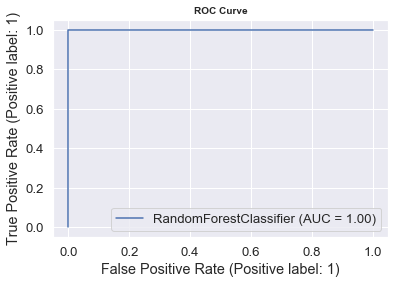

In [40]:
#RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train, y_train)
print('RandomForestClassifier')

cv_rfc = cross_val_score(estimator = rfc, X =X_train, y =y_train, cv = 10)
print('Cross Validation score : ', cv_rfc.mean())

pred_rfc_test = rfc.predict(X_test)
rfc_acc_test = accuracy_score(y_test, pred_rfc_test)
print('Test set score : ', rfc_acc_test)

pred_rfc_train = rfc.predict(X_train)
rfc_acc_train = accuracy_score(y_train, pred_rfc_train)
print('Train set score : ', rfc_acc_train)

print('Precision: ',precision_score(y_test, pred_rfc_test))
print('Recall: ',recall_score(y_test, pred_rfc_test))
print('F1: ',f1_score(y_test, pred_rfc_test))

con_mat = confusion_matrix(y_test, rfc.predict(X_test))

plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlOrRd")
plt.title("Confusion matrix", fontweight= 'bold', fontsize = 10)

metrics.plot_roc_curve(rfc, X_test, y_test)   
plt.title("ROC Curve", fontweight= 'bold', fontsize = 10)
plt.show()

LogisticRegression
Cross Validation score :  0.7065604778496765
Test set score :  0.6991869918699187
Train set score :  0.7049247049247049
Precision:  0.6959247648902821
Recall:  0.7161290322580646
F1:  0.7058823529411764


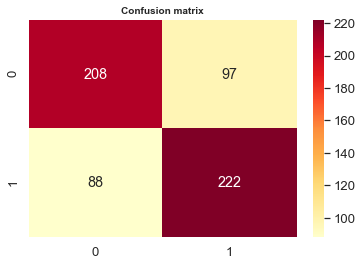

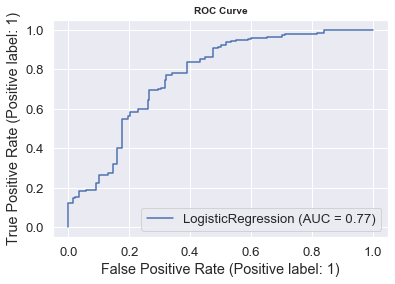

In [41]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('LogisticRegression')

cv_lr = cross_val_score(estimator = lr, X =X_train, y =y_train, cv = 10)
print('Cross Validation score : ', cv_lr.mean())

pred_lr_test = lr.predict(X_test)
lr_acc_test = accuracy_score(y_test, pred_lr_test)
print('Test set score : ', lr_acc_test)

pred_lr_train = lr.predict(X_train)
lr_acc_train = accuracy_score(y_train, pred_lr_train)
print('Train set score : ', lr_acc_train)

print('Precision: ',precision_score(y_test, pred_lr_test))
print('Recall: ',recall_score(y_test, pred_lr_test))
print('F1: ',f1_score(y_test, pred_lr_test))

con_mat = confusion_matrix(y_test, lr.predict(X_test))

plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlOrRd")
plt.title("Confusion matrix", fontweight= 'bold', fontsize = 10)

metrics.plot_roc_curve(lr, X_test, y_test)   
plt.title("ROC Curve", fontweight= 'bold', fontsize = 10)
plt.show()

KNeighborsClassifier
Cross Validation score :  0.9662153641944583
Test set score :  0.9691056910569106
Train set score :  0.9837199837199837
Precision:  1.0
Recall:  0.9387096774193548
F1:  0.9683860232945092


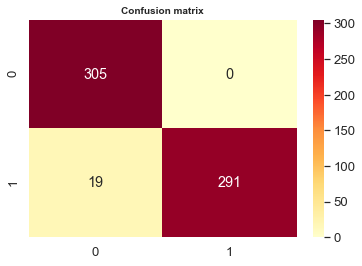

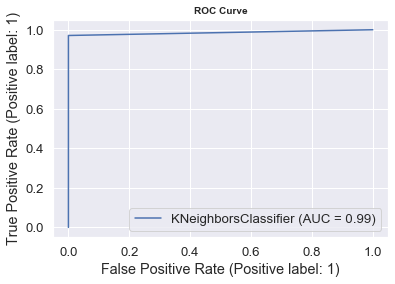

In [42]:
#KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
print('KNeighborsClassifier')

cv_knn = cross_val_score(estimator = knn, X =X_train, y =y_train, cv = 10)
print('Cross Validation score : ', cv_knn.mean())

pred_knn_test = knn.predict(X_test)
knn_acc_test = accuracy_score(y_test, pred_knn_test)
print('Test set score : ', knn_acc_test)

pred_knn_train = knn.predict(X_train)
knn_acc_train = accuracy_score(y_train, pred_knn_train)
print('Train set score : ', knn_acc_train)

print('Precision: ',precision_score(y_test, pred_knn_test))
print('Recall: ',recall_score(y_test, pred_knn_test))
print('F1: ',f1_score(y_test, pred_knn_test))

con_mat = confusion_matrix(y_test, knn.predict(X_test))

plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlOrRd")
plt.title("Confusion matrix", fontweight= 'bold', fontsize = 10)

metrics.plot_roc_curve(knn, X_test, y_test)   
plt.title("ROC Curve", fontweight= 'bold', fontsize = 10)
plt.show()

SVC
Cross Validation score :  0.880748299319728
Test set score :  0.8682926829268293
Train set score :  0.8917378917378918
Precision:  0.9045936395759717
Recall:  0.8258064516129032
F1:  0.863406408094435


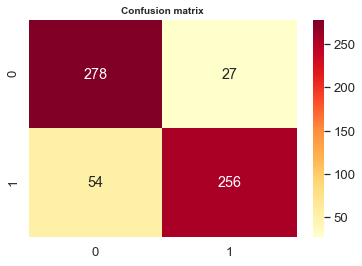

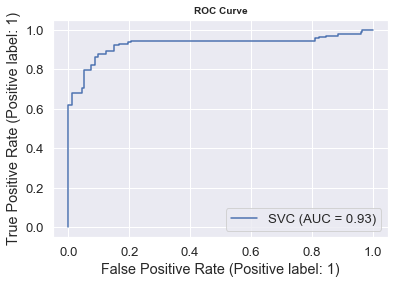

In [43]:
#SVC
svc = SVC()
svc.fit(X_train, y_train)
print('SVC')

cv_svc = cross_val_score(estimator = svc, X =X_train, y =y_train, cv = 10)
print('Cross Validation score : ', cv_svc.mean())

pred_svc_test = svc.predict(X_test)
svc_acc_test = accuracy_score(y_test, pred_svc_test)
print('Test set score : ', svc_acc_test)

pred_svc_train = svc.predict(X_train)
svc_acc_train = accuracy_score(y_train, pred_svc_train)
print('Train set score : ', svc_acc_train)

print('Precision: ',precision_score(y_test, pred_svc_test))
print('Recall: ',recall_score(y_test, pred_svc_test))
print('F1: ',f1_score(y_test, pred_svc_test))

con_mat = confusion_matrix(y_test, svc.predict(X_test))

plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlOrRd")
plt.title("Confusion matrix", fontweight= 'bold', fontsize = 10)

metrics.plot_roc_curve(svc, X_test, y_test)   
plt.title("ROC Curve", fontweight= 'bold', fontsize = 10)
plt.show()

[15:20:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
[15:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:47] WARNING: C:/Users/Administrator/workspace/xgb

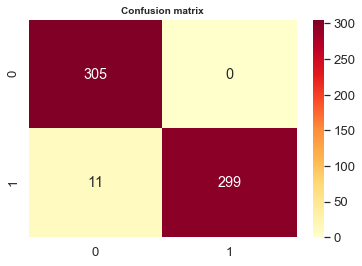

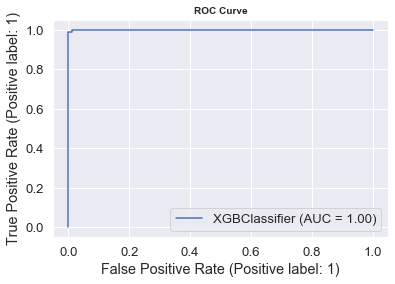

In [44]:
#XGB
xgb = XGBClassifier(learning_rate=0.1, n_estimators=100, use_label_encoder=False)
xgb.fit(X_train, y_train)
print('XGBClassifier')

cv_xgb = cross_val_score(estimator = xgb, X =X_train, y =y_train, cv = 10)
print('Cross Validation score : ', cv_xgb.mean())

pred_xgb_test = xgb.predict(X_test)
xgb_acc_test = accuracy_score(y_test, pred_xgb_test)
print('Test set score : ', xgb_acc_test)

pred_xgb_train = xgb.predict(X_train)
xgb_acc_train = accuracy_score(y_train, pred_xgb_train)
print('Train set score : ', xgb_acc_train)

print('Precision: ',precision_score(y_test, pred_xgb_test))
print('Recall: ',recall_score(y_test, pred_xgb_test))
print('F1: ',f1_score(y_test, pred_xgb_test))

con_mat = confusion_matrix(y_test, xgb.predict(X_test))

plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlOrRd")
plt.title("Confusion matrix", fontweight= 'bold', fontsize = 10)

metrics.plot_roc_curve(xgb, X_test, y_test)   
plt.title("ROC Curve", fontweight= 'bold', fontsize = 10)
plt.show()

In [45]:
classification_models = pd.DataFrame({
    'Classification Model': ['RandomForestClassifier',
                             'LogisticRegression',
                             'KNeighborsClassifier',
                             'SVC',
                              'XGBClassifier'],
    'Test score':[rfc_acc_test, lr_acc_test, knn_acc_test, svc_acc_test, xgb_acc_test],
    'Train score':[rfc_acc_train, lr_acc_train, knn_acc_train, svc_acc_train, xgb_acc_train]
})

classification_models.sort_values(by='Test score', ascending=False).style.hide_index()

Classification Model,Test score,Train score
RandomForestClassifier,0.996748,1.000000
XGBClassifier,0.982114,0.998779
KNeighborsClassifier,0.969106,0.983720
SVC,0.868293,0.891738
LogisticRegression,0.699187,0.704925
